In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
x=np.linspace(-1, 1, 100)
y_1=-0.6*np.sin(np.pi/2 + 3*x) - 0.35
y_2=-0.6*np.sin(np.pi/2 + 3*x) + 0.25
n=len(x)

## convert into dataframe for later use
x_1=np.zeros(shape=(n, 3))
x_2=np.zeros(shape=(n, 3))

for i in range(len(x)):
   x_1[i, 0]=x[i]
   x_1[i, 1]=y_1[i]
   x_1[i, 2]=-1
   x_2[i, 0]=x[i]
   x_2[i, 1]=y_2[i]
   x_2[i, 2]=1

df2=pd.DataFrame(np.concatenate((x_1, x_2), axis=0))
df2.columns=['X', 'Y', 'Label']
df2v=df2.values

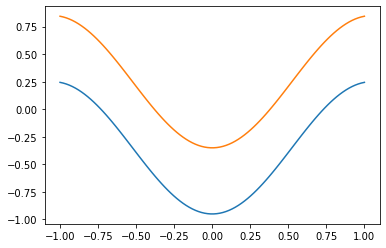

In [7]:
plt.plot(x, y_1)
plt.plot(x, y_2)

/Users/Renaissance/anaconda2/envs/3point6/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


If we use a striahgt line, the accuracy is 0.68


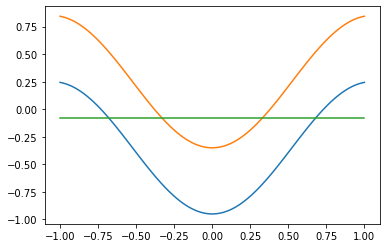

In [12]:
## 3.1 Direct Striaght Line
m1=svm.SVC(kernel='linear', gamma=0.01, C=5)
m1.fit(df2[['X', 'Y']], df2[['Label']])

## get coeffcient from linear svc
w0=m1.coef_[0][0]
w1=m1.coef_[0][1]
b=m1.intercept_[0]

y_pred_= (-1*w0*x-b)/w1
y_pred= m1.predict(df2[['X', 'Y']])

## metrics
#confusion_matrix(df2[['Label']].values, y_pred)
as_=accuracy_score(df2[['Label']].values, y_pred)

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_pred_)
print('If we use a striahgt line, the accuracy is', as_)

In [15]:
from scipy.optimize import minimize

In [93]:
## 3.2
## define the loss function
def loss_(params):
    
    loss=0
    x=np.array(np.linspace(-1, 1, 100))
    y1=np.array(-0.6*np.sin(np.pi/2 + 3*x) - 0.35)
    y2=np.array(-0.6*np.sin(np.pi/2 + 3*x) + 0.25)
    
    w11, w12, w21, w22, b1, b2, a, b, c=params
    
    x1=np.tanh(np.multiply(w11, x)+np.multiply(w21, y1)+b1)
    x2=np.tanh(np.multiply(w11, x)+np.multiply(w21, y2)+b1)
    
    y1=np.tanh(np.multiply(w12, x)+np.multiply(w22, y1)+b2)
    y2=np.tanh(np.multiply(w12, x)+np.multiply(w22, y2)+b2)
    
    for i in range(len(x)):
        if (x1[i]*a + b*(y1[i])+c)*-1 < 0:
                loss -= (x1[i]*a + b*(y1[i])+c)*-1
        if (x2[i]*a + b*(y2[i])+c)*1  < 0: 
                loss -= (x2[i]*a + b*(y2[i])+c)*1
        
    return loss
    
initial_guess=[-3, -3, -3, -3, -1, -1, -2, -2, -2]
bnds = ((-3, 3), (-3, 3), (-3, 3), (-3, 3), (-1, 1), (-1, 1), (-2, 2), (-2, 2), (-2, 2))

result=minimize(loss_, initial_guess, bounds=bnds, method='Powell')
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)
    

[ 1.75860218 -2.37132289 -1.36040257 -1.68702446 -1.18432855 -1.71212327
 -1.37132288 -2.         -2.11014192]


/Users/Renaissance/anaconda2/envs/3point6/lib/python3.7/site-packages/scipy/optimize/_minimize.py:516: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)


In [94]:
loss_(fitted_params)

0

In [95]:
w11=fitted_params[0]
w12=fitted_params[1]
w21=fitted_params[2]
w22=fitted_params[3]
b1=fitted_params[4]
b2=fitted_params[5]
a=fitted_params[6]
b=fitted_params[7]
c=fitted_params[8]

In [96]:
x=np.linspace(-1, 1, 100)
y1=-0.6*np.sin(np.pi/2 + 3*x) - 0.35
y2=-0.6*np.sin(np.pi/2 + 3*x) + 0.25

In [97]:
x1=np.tanh(np.multiply(w11, x)+np.multiply(w21, y1)+b1)
x2=np.tanh(np.multiply(w11, x)+np.multiply(w21, y2)+b1)
    
y1=np.tanh(np.multiply(w12, x)+np.multiply(w22, y1)+b2)
y2=np.tanh(np.multiply(w12, x)+np.multiply(w22, y2)+b2)

In [98]:
y_pred=(-1*np.multiply(x, a)-c)/b

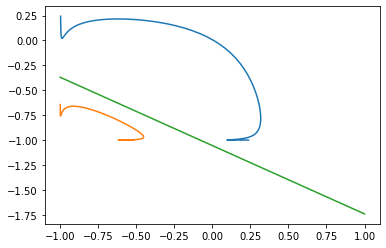

In [99]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x, y_pred)

In [ ]:
### 3.3

In [141]:
def hinge_loss(params):
    
    loss=0
    x=np.array(np.linspace(-1, 1, 100))
    y1=np.array(-0.6*np.sin(np.pi/2 + 3*x) - 0.35)
    y2=np.array(-0.6*np.sin(np.pi/2 + 3*x) + 0.25)
    
    w11, w12, w21, w22, b1, b2, a, b, c=params
    
    x1=np.tanh(np.multiply(w11, x)+np.multiply(w21, y1)+b1)
    x2=np.tanh(np.multiply(w11, x)+np.multiply(w21, y2)+b1)
    
    y1=np.tanh(np.multiply(w12, x)+np.multiply(w22, y1)+b2)
    y2=np.tanh(np.multiply(w12, x)+np.multiply(w22, y2)+b2)
    
    for i in range(len(x)):
            loss += max(0, 1-(x1[i]*a + b*(y1[i])+c)*-1)
            loss += max(0, 1-(x2[i]*a + b*(y2[i])+c)*1)
        
    return loss


initial_guess=[-3, -3, -3, -3, -1, -1, -2, -2, -2]
bnds = ((-3, 3), (-3, 3), (-3, 3), (-3, 3), (-1, 1), (-1, 1), (-2, 2), (-2, 2), (-2, 2))

result=minimize(hinge_loss, initial_guess, bounds=bnds, method='Nelder-Mead')
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)

/Users/Renaissance/anaconda2/envs/3point6/lib/python3.7/site-packages/scipy/optimize/_minimize.py:516: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


[-3.07481717  5.04038851 -2.25291817 -4.32636621 -1.78014867 -2.66059283
 -2.35051972 -1.98480633 -2.00600339]


In [142]:
loss_(fitted_params)

0

In [143]:
w11=fitted_params[0]
w12=fitted_params[1]
w21=fitted_params[2]
w22=fitted_params[3]
b1=fitted_params[4]
b2=fitted_params[5]
a=fitted_params[6]
b=fitted_params[7]
c=fitted_params[8]

In [144]:
x=np.linspace(-1, 1, 100)
y1=-0.6*np.sin(np.pi/2 + 3*x) - 0.35
y2=-0.6*np.sin(np.pi/2 + 3*x) + 0.25

In [145]:
x1=np.tanh(np.multiply(w11, x)+np.multiply(w21, y1)+b1)
x2=np.tanh(np.multiply(w11, x)+np.multiply(w21, y2)+b1)
    
y1=np.tanh(np.multiply(w12, x)+np.multiply(w22, y1)+b2)
y2=np.tanh(np.multiply(w12, x)+np.multiply(w22, y2)+b2)

In [146]:
y_pred=(-1*np.multiply(x, a)-c)/b

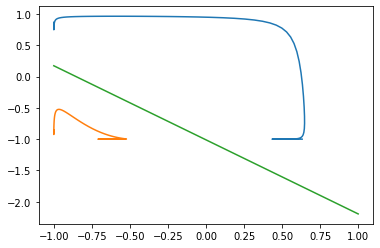

In [147]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x, y_pred)